Bins: [-250.587      -240.83359184 -231.08018367 -221.32677551 -211.57336735
 -201.81995918 -192.06655102 -182.31314286 -172.55973469 -162.80632653
 -153.05291837 -143.2995102  -133.54610204 -123.79269388 -114.03928571
 -104.28587755  -94.53246939  -84.77906122  -75.02565306  -65.2722449
  -55.51883673  -45.76542857  -36.01202041  -26.25861224  -16.50520408
   -6.75179592    3.00161224   12.75502041   22.50842857   32.26183673
   42.0152449    51.76865306   61.52206122   71.27546939   81.02887755
   90.78228571  100.53569388  110.28910204  120.0425102   129.79591837
  139.54932653  149.30273469  159.05614286  168.80955102  178.56295918
  188.31636735  198.06977551  207.82318367  217.57659184  227.33      ]
Histogram
Serial Time: 1.604352s


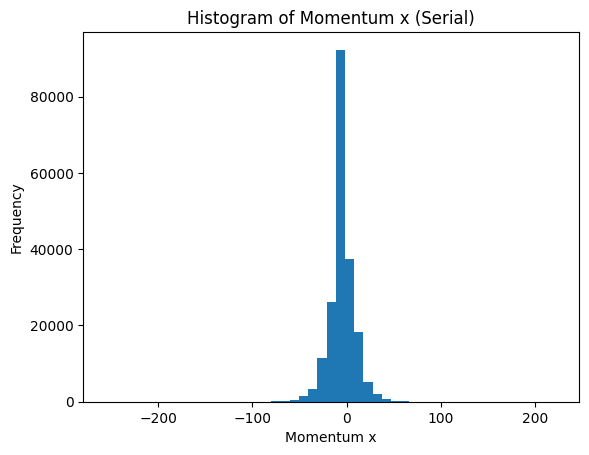

Parallel Time: 0.740409s


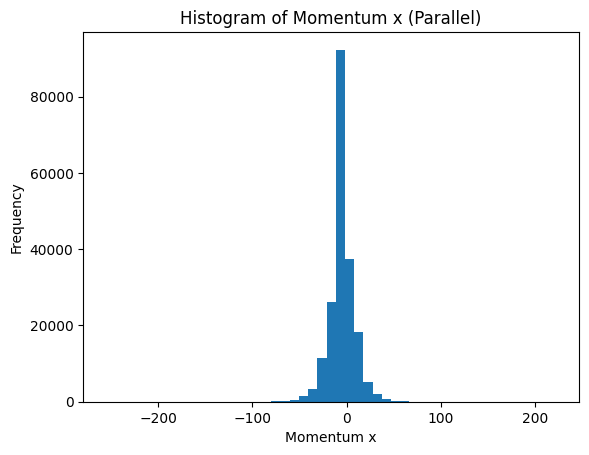

In [12]:
"""
# Histogram
-----------

Un histograma es una representación gráfica de la distribución de un conjunto de datos. Para construirlo, los datos se agrupan en intervalos (`bins`) y se cuenta cuántos valores caen dentro de cada uno. En el gráfico resultante, el eje `x` representa los intervalos, mientras que el eje `y` indica la frecuencia de los datos en cada uno.

En este caso, los bins representan rangos de valores del momentum de una partícula. El momentum es una magnitud vectorial definida como el producto de la masa de un objeto por su velocidad. Se generará un histograma para la componente `x` del momentum de un conjunto de partículas registradas en 100,000 eventos del experimento CMS en el CERN (https://opendata.cern.ch/record/304).

Los histogramas son herramientas fundamentales en física de partículas para analizar y visualizar la distribución de los datos. Normalmente estos se crearían con herramientas especializadas como ROOT o directamente con `matplotlib`.

> https://en.wikipedia.org/wiki/Compact_Muon_Solenoid
"""

from numba import njit, prange
import matplotlib.pyplot as plt
import numpy as np
import time

INPUT_FILE = "../assets/CERN_CMS_Events_with_two_electrons_from_2010.csv"
BIN_COUNT = 50

# Momentum in the x component of the first electron
momentum_x = np.genfromtxt(INPUT_FILE, delimiter=",", skip_header=1, usecols=3)
# Momentum in the x component of the second electron
momentum_x = np.concatenate(
    (momentum_x, np.genfromtxt(INPUT_FILE, delimiter=",", skip_header=1, usecols=11))
)

max_momentum_x = np.max(momentum_x)
min_momentum_x = np.min(momentum_x)

bins = np.linspace(min_momentum_x, max_momentum_x, BIN_COUNT)
print(f"Bins: {bins}")


def make_histogram_serial(momentum_x, bins):
    histogram = np.zeros(len(bins) - 1, dtype=np.int64)
    for i in range(len(bins) - 1):
        for j in range(len(momentum_x)):
            if bins[i] <= momentum_x[j] < bins[i + 1]:
                histogram[i] += 1
    return histogram


@njit(parallel=True)
def make_histogram_parallel(momentum_x, bins):
    histogram = np.zeros(len(bins) - 1, dtype=np.int64)
    for i in prange(len(bins) - 1):
        for j in range(len(momentum_x)):
            if bins[i] <= momentum_x[j] < bins[i + 1]:
                histogram[i] += 1

    return histogram


print("Histogram")

serial_start = time.perf_counter()
histogram_serial = make_histogram_serial(momentum_x, bins)
serial_end = time.perf_counter()
print(f"Serial Time: {serial_end - serial_start:.6f}s")
plt.bar(bins[:-1], histogram_serial, width=bins[1] - bins[0])
plt.xlabel("Momentum x")
plt.ylabel("Frequency")
plt.title("Histogram of Momentum x (Serial)")
plt.show()

parallel_start = time.perf_counter()
histogram_parallel = make_histogram_parallel(momentum_x, bins)
parallel_end = time.perf_counter()
print(f"Parallel Time: {parallel_end - parallel_start:.6f}s")
plt.bar(bins[:-1], histogram_parallel, width=bins[1] - bins[0])
plt.xlabel("Momentum x")
plt.ylabel("Frequency")
plt.title("Histogram of Momentum x (Parallel)")
plt.show()